# CUSTOMER SEGMENTATION FOR THE TRAVEL AGENCY
*By Ngoc Ngan Huynh*

In [1]:
## Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Import datasets
dat = pd.read_csv('data/data.csv')

## Exploratory Data Analysis

In [2]:
# Summarise key statistics
dat.describe().round(2)

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.60,0.5,40.82,1.46,137516.20,0.61,0.83
std,0.49,0.5,9.46,0.78,46184.30,0.67,0.97
min,0.00,0.0,20.00,0.00,35832.00,0.00,0.00
25%,0.00,0.0,33.00,1.00,101262.75,0.00,0.00
50%,1.00,1.0,40.00,1.00,133004.00,1.00,0.00
75%,1.00,1.0,48.00,2.00,171232.50,1.00,2.00
max,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [3]:
# Mapping dictionaries for each ordinal variables
gender_mapping = {0: 'Male', 1: 'Female'}
marital_status_mapping = {0: 'Single', 1: 'Non-single'}
education_mapping = {0: 'Other/ unknown', 1: 'High school', 2: 'University', 3: 'Graduate school'}
occupation_mapping = {0: 'Unemployed / Unskilled', 1: 'Skilled employee / Official', 2: 'Management / Self-employed / Highly qualified employee / Officer'}
settlement_size_mapping = {0: 'Small city', 1: 'Mid-sized city', 2: 'Big city'}

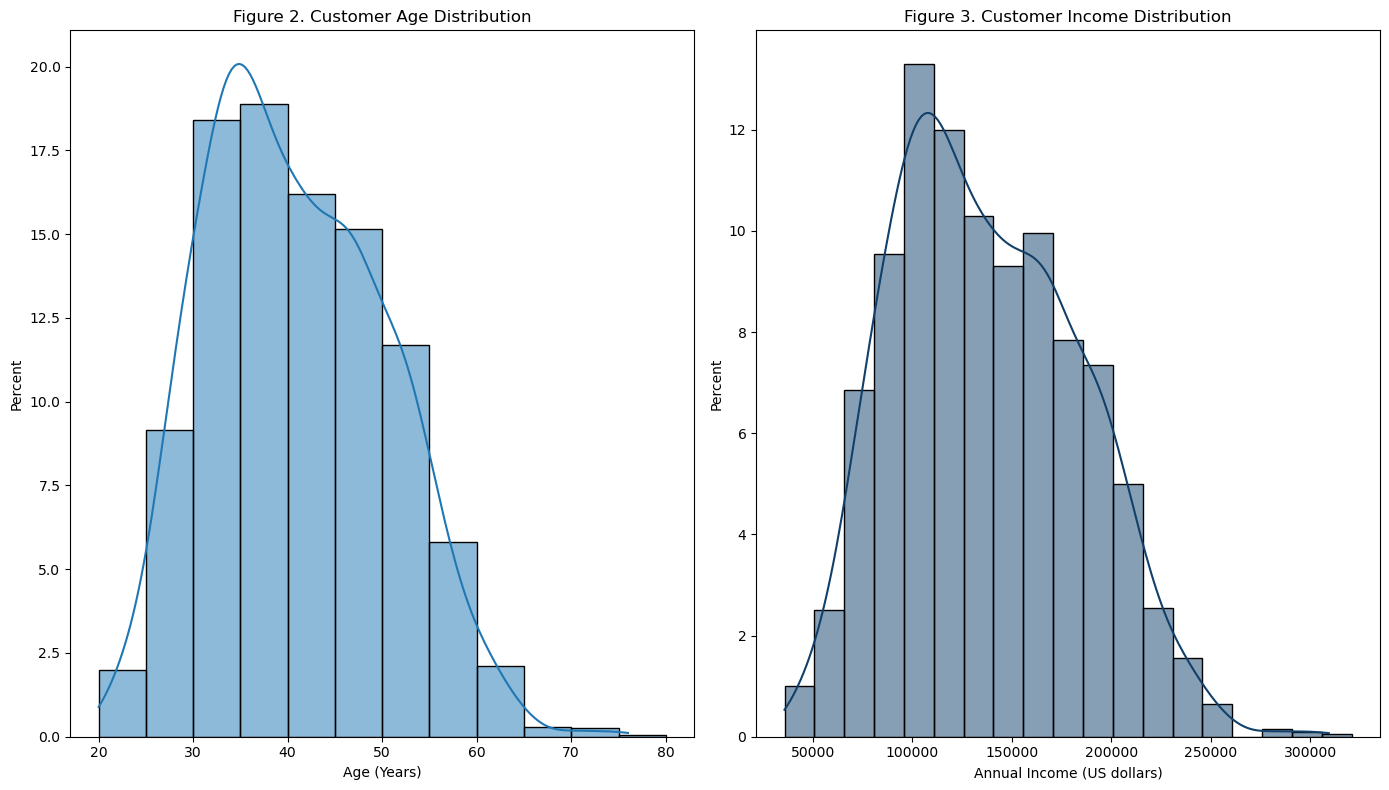

In [17]:
# Plot the distribution of customer ages and incomes
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Age distribution plot using histplot
age_dist = sns.histplot(dat.assign(Gender=dat['Gender'].map(gender_mapping)), x='Age', ax=axes[0], stat='percent', kde=True, binwidth = 5)
age_dist.set(title="Figure 2. Customer Age Distribution", xlabel='Age (Years)')

# Income distribution plot using histplot
income_dist = sns.histplot(dat.assign(Occupation=dat['Occupation'].map(occupation_mapping)), x='Income', ax=axes[1], stat='percent', kde=True, color = '#11406a', binwidth = 15000)
income_dist.set(title="Figure 3. Customer Income Distribution", xlabel='Annual Income (US dollars)')

plt.tight_layout()
plt.show()

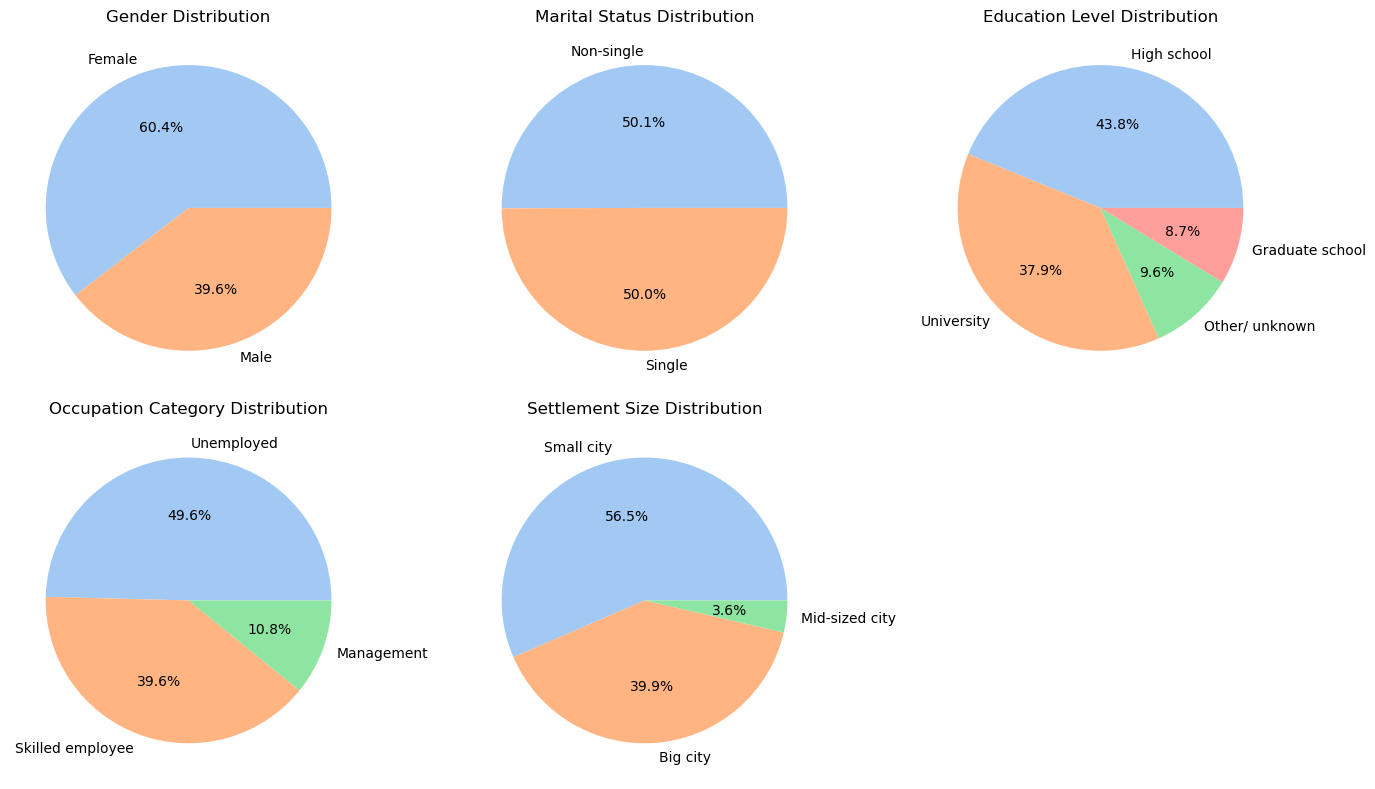

In [5]:
# Pie charts for categorical/ ordinal variables

fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Define a function to generate pie charts
def plot_pie_chart(data, x_var, ax, title):
    data[x_var].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, colors=sns.color_palette('pastel'))
    ax.set_title(title)
    ax.set_ylabel('')

# Plot Gender Distribution as a pie chart
plot_pie_chart(
    dat.assign(Gender=dat['Gender'].map(gender_mapping)), 
    'Gender', 
    axes[0, 0], 
    'Gender Distribution'
)

# Plot Marital Status Distribution as a pie chart
plot_pie_chart(
    dat.assign(Marital_Status=dat['Marital Status'].map(marital_status_mapping)), 
    'Marital_Status', 
    axes[0, 1], 
    'Marital Status Distribution'
)

# Plot Education Level Distribution as a pie chart
plot_pie_chart(
    dat.assign(Education=dat['Education'].map(education_mapping)), 
    'Education', 
    axes[0, 2], 
    'Education Level Distribution'
)

# Plot Occupation Category Distribution as a pie chart
plot_pie_chart(
    dat.assign(Occupation=dat['Occupation'].map({0: 'Unemployed', 1: 'Skilled employee', 2: 'Management'})), 
    'Occupation', 
    axes[1, 0], 
    'Occupation Category Distribution'
)

# Plot Settlement Size Distribution as a pie chart
plot_pie_chart(
    dat.assign(Settlement_Size=dat['Settlement Size'].map(settlement_size_mapping)), 
    'Settlement_Size', 
    axes[1, 1], 
    'Settlement Size Distribution'
)

# Hide the last subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

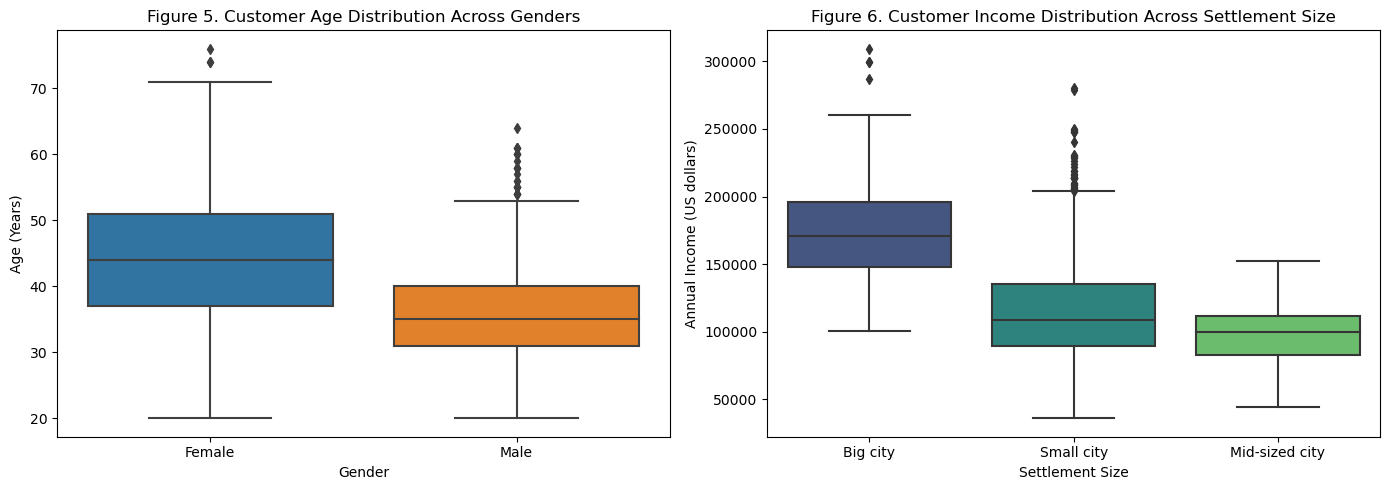

In [37]:
# Plot the distribution of customers' ages across genders and distribution of customers' income across occupation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for Ages across Genders
age_box = sns.boxplot(data=dat.assign(Gender=dat['Gender'].map(gender_mapping)), x='Gender', y='Age', ax=axes[0])
axes[0].set_title("Figure 5. Customer Age Distribution Across Genders")
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age (Years)')

# Boxplot for Income across Occupations
income_box = sns.boxplot(data=dat.assign(Settlement_Size=dat['Settlement Size'].map(settlement_size_mapping)), x='Settlement_Size', y='Income', ax=axes[1], palette = "viridis")
axes[1].set_title("Figure 6. Customer Income Distribution Across Settlement Size")
axes[1].set_xlabel('Settlement Size')
axes[1].set_ylabel('Annual Income (US dollars)')

plt.tight_layout()
plt.show()

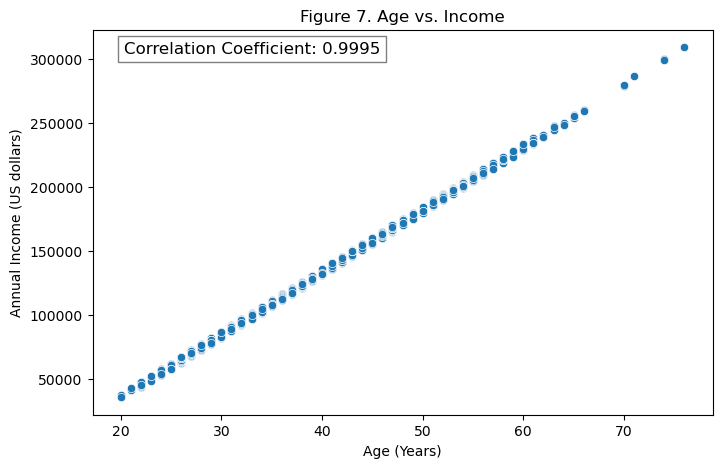

In [42]:
## Scatter plots for 2 numeric variables: 'Age' and 'Income'

# Calculate the correlation coefficient between Age and Income
corr_coeff, _ = pearsonr(dat['Age'], dat['Income'])

plt.figure(figsize=(8,5))
scatter_plt = sns.scatterplot(data = dat, x="Age", y = "Income")
scatter_plt.set(title = 'Figure 7. Age vs. Income', xlabel = 'Age (Years)',ylabel = 'Annual Income (US dollars)')
scatter_plt.text(0.05, 0.95, f'Correlation Coefficient: {corr_coeff:.4f}', 
         fontsize=12, ha='left', va='center', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()

## Customer Segmentation with K-means++ and Agglomerative Clustering Methods

In [43]:
# Scale 2 numeric variables 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dat[['Age_scaled', 'Income_scaled']] = scaler.fit_transform(dat[['Age', 'Income']])

dat.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,Age_scaled,Income_scaled
0,1,1,39,2,130568,1,2,-0.192892,-0.150483
1,0,0,29,1,80315,0,0,-1.250703,-1.238852
2,1,0,35,0,107067,0,0,-0.616016,-0.659462
3,0,1,56,2,214000,1,0,1.605387,1.656471
4,1,1,45,2,158138,1,2,0.441795,0.446623


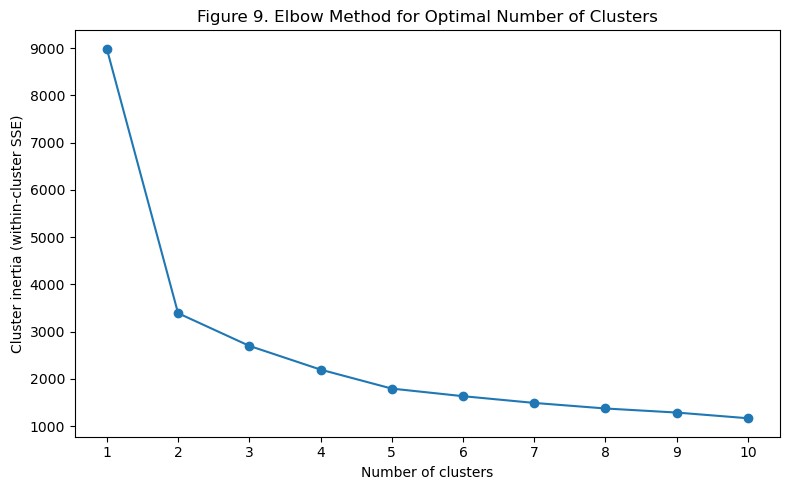

In [45]:
## Identify the optimal number of clusters
from sklearn.cluster import KMeans

# Initiate kmeans ++
X = dat.drop(['Age', 'Income'], axis=1)

inertias = [] 

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Figure 9. Elbow Method for Optimal Number of Clusters")
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

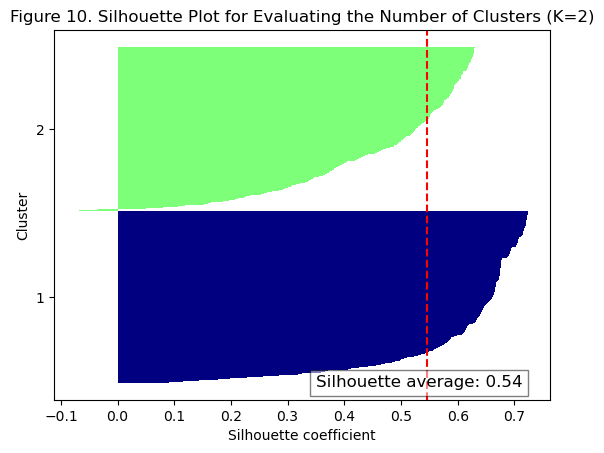

<Figure size 700x500 with 0 Axes>

In [61]:
# Evaluate the number of clusters using Silhouette Plots, start with k = 2

from matplotlib import cm

from sklearn.metrics import silhouette_samples

# Define function to make Silhouette plots, with parameter k
def plot_silhouette (k):
    ## Compute silhouette values
    km = KMeans(n_clusters=k,  
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)

    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

    ## Plot silhouette values

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
        
        
    silhouette_avg = np.mean(silhouette_vals)
    
    plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

    plt.text(0.35, 0.7, f'Silhouette average: {silhouette_avg:.2f}', 
             fontsize=12, ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5))
    
    plt.title(f"Figure {9+i}. Silhouette Plot for Evaluating the Number of Clusters (K={k})")
    
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.figure(figsize=(7,5))

    plt.tight_layout()
    return plt.show()

# Make Silhouette plot for k = 2
plot_silhouette(2)

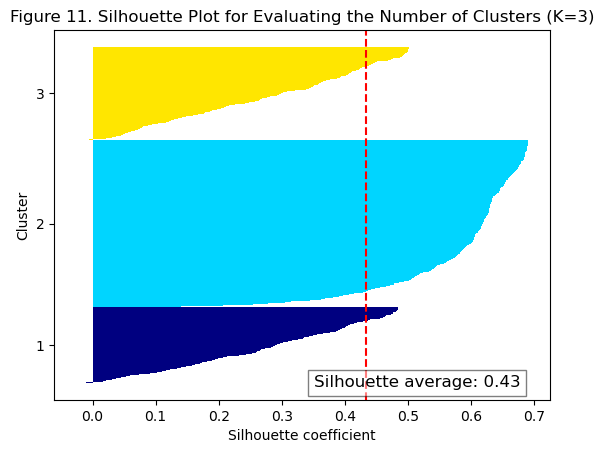

<Figure size 700x500 with 0 Axes>

In [62]:
# Silhouette Plot with k = 3
plot_silhouette(3)

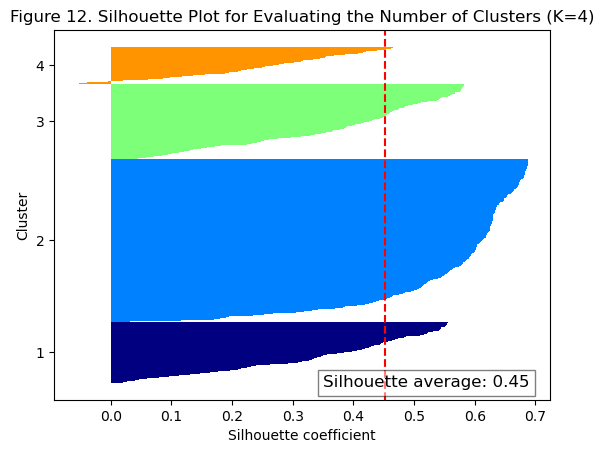

<Figure size 700x500 with 0 Axes>

In [63]:
# Silhouette Plot with k = 4
plot_silhouette(k = 4)

In [13]:
# Estimate the observations' labels using K-means ++ 
km_plus = KMeans(n_clusters=2, 
            init='k-means++',  
            n_init=10,      
            max_iter=300,   
            random_state=0)

k_labels = km_plus.fit_predict(X)

print(k_labels[:10])

[1 0 0 1 1 0 1 1 0 1]


In [59]:
# Cluster centers of k-means ++ clustering technique

# Compute centroids for all clusters
k_centroids = km_plus.cluster_centers_

# Define function to return the cluster estimation results, with parameters of each method's centroids and labels
def return_cluster_result (centroids, labels): 
    # Use np.where to find the indices of numerical and categorical columns
    numerical_column_indices = np.where(X.columns.isin(['Age_scaled', 'Income_scaled']))[0]
    categorical_column_indices = np.where(~X.columns.isin(['Age_scaled', 'Income_scaled']))[0]

    # Slice the centroids for numerical columns ('Age_scaled' and 'Income_scaled')
    numerical_centroids_scaled = centroids[:, numerical_column_indices]

    # Inverse transform the scaled centroids back to original scale
    numerical_centroids_original = scaler.inverse_transform(numerical_centroids_scaled)

    # Compute categorical centroids for each categorical column
    categorical_centroids = centroids[:, categorical_column_indices]

    # Count the number of customers in each cluster
    cluster_sizes = np.array([sum(labels == cluster) for cluster in np.unique(labels)])

    # Create a DataFrame for numerical centroids (Age, Income)
    numerical_column_names = [f'Avg {col}' for col in ['Age', 'Income']]
    centroid_df = pd.DataFrame(numerical_centroids_original, columns=numerical_column_names)

    # Create a DataFrame for categorical centroids and join with numerical DataFrame
    categorical_columns = X.columns[categorical_column_indices]
    categorical_column_names = [f'{col}' for col in categorical_columns]
    categorical_df = pd.DataFrame(categorical_centroids, columns=categorical_column_names)
    centroid_df = centroid_df.join(categorical_df)

    # Add the number of customers to the DataFrame
    centroid_df['No. Customers'] = cluster_sizes

    # Assign appropriate cluster labels to the DataFrame index
    centroid_df.index = [f'Cluster {i+1}' for i in range(len(centroid_df))]
    
    # Mapping ordinal variables
    centroid_df['Gender'] = centroid_df['Gender'].round(0).map(gender_mapping)
    centroid_df['Marital Status'] = centroid_df['Marital Status'].round(0).map(marital_status_mapping)
    centroid_df['Education'] = centroid_df['Education'].round(0).map(education_mapping)
    centroid_df['Occupation'] = centroid_df['Occupation'].round(0).map(occupation_mapping)
    centroid_df['Settlement Size'] = centroid_df['Settlement Size'].round(0).map(settlement_size_mapping)

    # Display the final table with cluster centers and number of customers
    return centroid_df.round(0)

# Return result for K-means++
return_cluster_result (k_centroids, k_labels)

,Avg Age,Avg Income,Gender,Marital Status,Education,Occupation,Settlement Size,No. Customers
Cluster 1,34.0,103257.0,Male,Single,High school,Unemployed / Unskilled,Small city,1024
Cluster 2,48.0,173461.0,Female,Non-single,University,Skilled employee / Official,Big city,976


In [15]:
# Estimate the clusters using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
ac_labels = ac.fit_predict(X)
print(ac_labels[0:10])

[0 1 1 0 0 0 0 0 0 0]


In [60]:
# Cluster centers of agglomerative clustering technique

# Compute agglomerative centroids for all clusters
ac_centroids = np.array([X[ac_labels == cluster].mean(axis=0) for cluster in np.unique(ac_labels)])

# Return result for agglomerative clustering
return_cluster_result (ac_centroids, ac_labels)

,Avg Age,Avg Income,Gender,Marital Status,Education,Occupation,Settlement Size,No. Customers
Cluster 1,47.0,168085.0,Female,Non-single,University,Skilled employee / Official,Mid-sized city,1163
Cluster 2,32.0,95041.0,Male,Single,High school,Unemployed / Unskilled,Small city,837
